#  Predicting the Risk of having a Stroke using Demographics and Health Factors a Person

This notebook includes the steps of building the Machine Learning model and relevant libraries which is used to develop a model to predict the risk of having Stroke using demographics and health factors of a person.

There are two machine algorithms used in here.
1. Logistic Regression
2. Naive Bayes Theorem

So the notebook contains data visualization, relevant libraries and the implemented code for the model.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Preprocessing
6. Modelling
7. Postprocessing
8. Comparing the two models

## 1. Problem Definition

- Task T: Predicting the risk of having a stroke
- Performance Measure P: Percent of correctly predicted result out of the total
test data set
- Training experience E: Using a set of data with given the stroke possibility

# 2. Data

The dataset selected for the modelling is available on Kaggle.
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?rvi=1

# 3. Evaluation

Let's consider the below.
- TP (True Positive) - Model predicts True for an Actual True value.
- TN (True Negative) - Model predicts Negative for an Actual Negative value.
- FP (False Positive) - Model predicts True for an Actual False value.
- FN (False Negative) - Model predicts False for an Actual True value

As this model is a health related model, here a person with stroke identifying as positive should be in a high value(TP). And identifying a person who has stroke as negative should be reduced(FN). In the concern of health sector these two parameters are specially important.

If a person who has not chance to having stroke is identified as a person who will have stroke it is also not good as this is a health concern(FP). And it is important to having negative result for a person who has not chance to having a stroke(TN).

By considering these conditions, there are several parameters should be in a high value.

1. Accuracy - Here accuracy concerns the true positive( identifying the result as positive for a positive result) and ture nagative( identifying the result as negative for a negative result).

Accuracy = $$ \frac{TP + TN}{TP + TN + FP + FN} $$

2. Sensitivity - Here sensitivity concerns having high true positive and reducing false nagative.

Sensitivity(Recall) = $$ \frac{TP}{TP + FN} $$

3. Specificity - Here specificity concerns having high true nagitive and reducing false positive.

Spesificity = $$ \frac{TN}{TN + FP} $$

4. Precision - Here  precision concerns having high true postive and reducing false positive.

Precision  = $$ \frac{TP}{TP + FP} $$

4. F1 Score - Here precsion means having a high precision and high sensitivity

F1 Score = $$ \frac{Precision X Recall}{Precision + Recall} $$

So here in our model our first target is to consider having high F1 Score
                                                    then having high accuracy
                                                    and then high specificity.

# 4. Features

Here you can refer the **data dictionary** of the features in data.

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### 4.1 Import Libraries

In [ ]:
# Import Data Handling Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Cross Validation Libraries from Scikit Learn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Import Scaling Libraries and Scaling Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import Sampling Model for Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import Evalution Metrices from Scikit Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

#Import for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.2 Load Data

In [ ]:
# Loading the data from .csv file and save in pada dataframe
df = pd. read_csv('/content/drive/MyDrive/ML/healthcare-dataset-stroke-data.csv')
# Displaying the data converted in to dataframe
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Identifying the shape of the dataframe
df.shape

(5110, 12)

## 5. Preprocessing
### 5.1 Overall Data Analysis and Visualization


In [ ]:
# Visualizing the first 5 records of the data set
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Visualizing the last 5 records of the data set
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Identifying the stroke positive nad negative numbers in the dataset
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

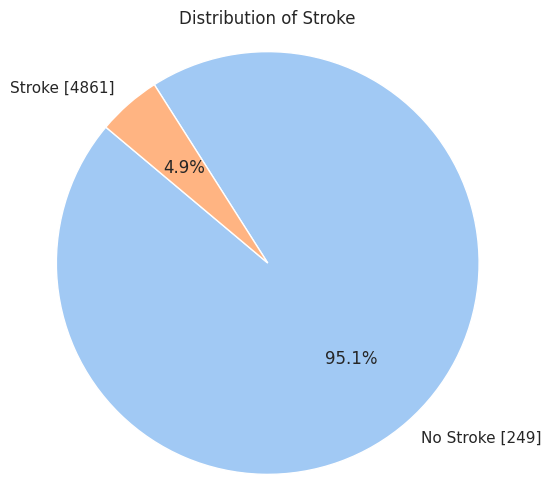

In [ ]:
# Representing the stroke distribution in pie chart for more clear as a percentage
stroke_counts = df['stroke'].value_counts()

# Using Seaborn's styling
plt.figure(figsize=(6, 6))
sns.set(style='whitegrid')

# Plotting a pie chart for the stroke frequencies
plt.pie(stroke_counts, labels=["No Stroke [249]", "Stroke [4861]"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Setting aspect ratio to be equal to make it a circle
plt.axis('equal')

# Setting a title for the pie chart
plt.title('Distribution of Stroke')

# Showing the pie chart
plt.show()

In [ ]:
# Feature Information - Specially the name and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Numerical Descriptions about Features
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Identifying the total number of missing values in features
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

201 out of 5110 is about 3.9% of data. Instead of adding a new value for null values, it is better to remove the whole record from the data set.

### 5.2 Data Cleaning

In [ ]:
# As only 'bmi column contains data we can remove any record from the data which has null values.
df.dropna(how='any', inplace=True)

In [ ]:
# Check whether the changes were applied to the dataset
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now there is no null values in the data set. Then we can use this complete one.

'id' is not affecting for causing a risk of having a stroke as it is a uniquly identifying feature. So we can remove 'id' column from the data set.

In [ ]:
# Dropping 'id' column from the dataset
df.drop(columns='id', inplace=True)

In [ ]:
# Checking whether the 'id' column is deleted
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Now the 'id' column has been removed.

### 5.3 Feature Analysis and Visualization

It is better to have an undersanding about the behavior of the data within the dataset before modelling.

#### 5.3.1 Stroke Frequency according to Gender, Hypertension, Heart Disease and Ever Married

In [ ]:
# Identifying the number of gender types in the data set.
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

There is only one record from other category. So it is not appropriate to use it for the modelling as one record from other category is not affecting overall model as the number for the other category is high.

In [ ]:
# Drop the column where 'Gender' is 'Other'
df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)

In [ ]:
# Checking whether the data with 'Other' category has been removed
df.gender.value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [ ]:
# Identifying the number of persons having and not having hypertension
df.hypertension.value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [ ]:
# Identifying the number of persons having and not having heart disease
df.heart_disease.value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [ ]:
# Identifying the number of persons ever married and never married
df.ever_married.value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

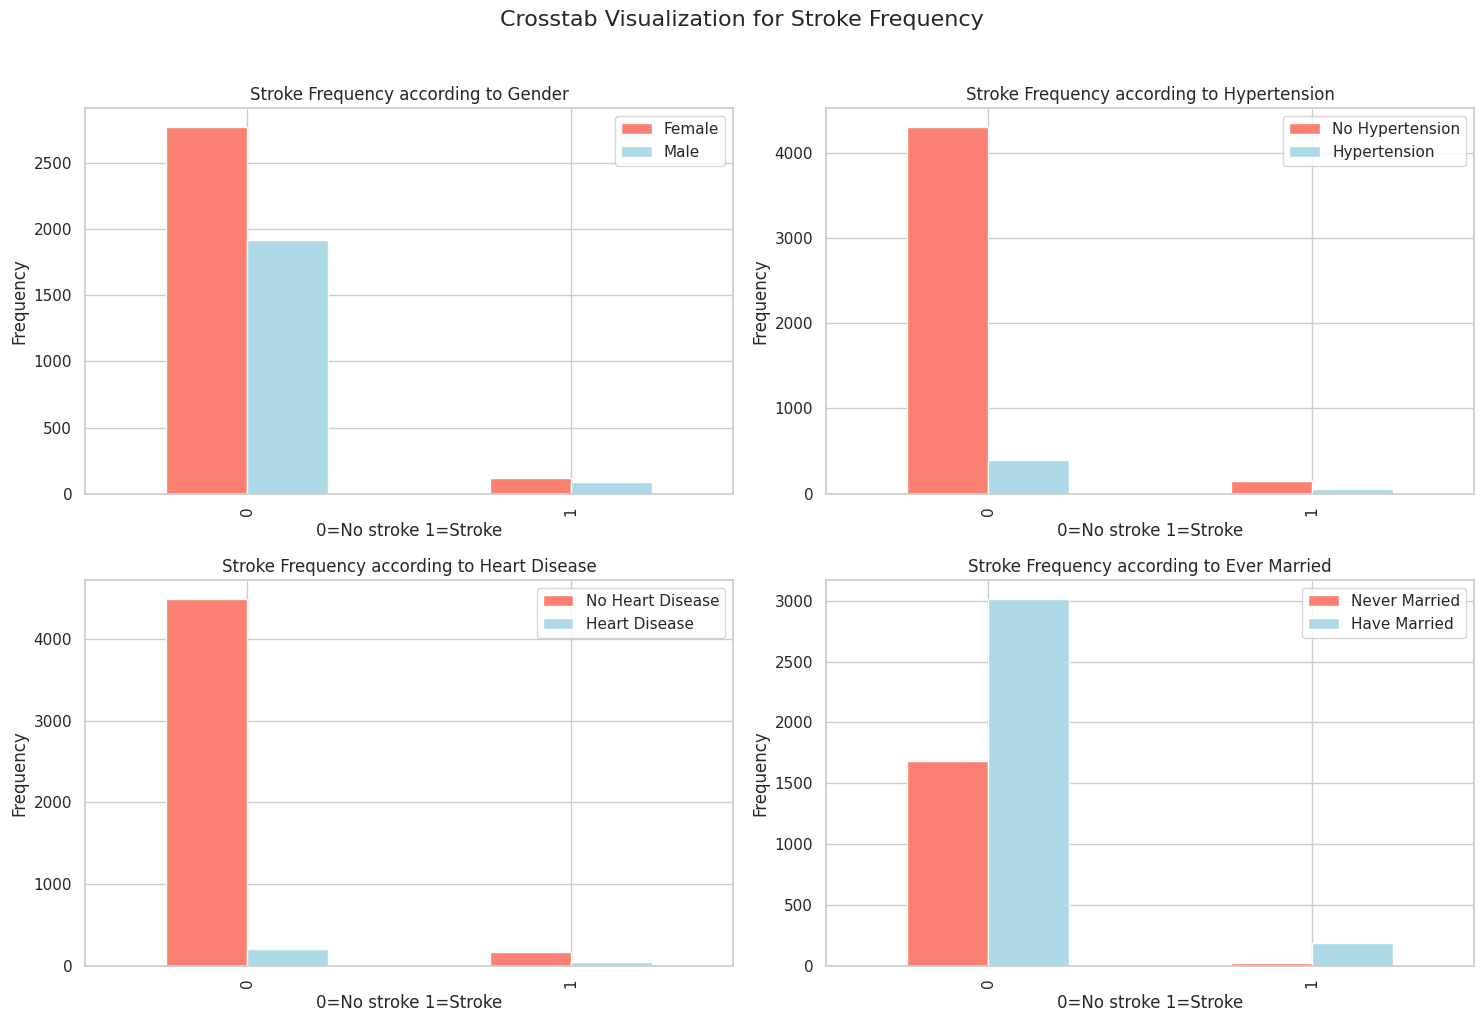

In [ ]:
# Crosstab visualization for stroke frequency

cross1 = pd.crosstab(df.stroke, df.gender)          #Crosstab for gender
cross2 = pd.crosstab(df.stroke, df.hypertension)    #Crosstab for hypertension
cross3 = pd.crosstab(df.stroke, df.heart_disease)   #Crosstab for heart disease
cross4 = pd.crosstab(df.stroke, df.ever_married)    #Crosstab for ever married

# Making subplots feature to plot all in one area by dividing into several plots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Plotting bar graphs to crosstabs made earlier
cross1.plot(kind='bar', ax=axs[0,0], color=["salmon","lightblue"])
cross2.plot(kind='bar', ax=axs[0,1], color=["salmon","lightblue"])
cross3.plot(kind='bar', ax=axs[1,0], color=["salmon","lightblue"])
cross4.plot(kind='bar', ax=axs[1,1], color=["salmon","lightblue"])

# Making a common title for the all of bar graphs
fig.suptitle('Crosstab Visualization for Stroke Frequency', fontsize=16, y=1.02)

# Making title, y label , x label and legend for each subplots
# Here axs[x, x] indicate the postion of the subplot
axs[0, 0].set_title('Stroke Frequency according to Gender')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel("0=No stroke 1=Stroke")
axs[0, 0].legend(["Female", "Male"])
axs[0, 1].set_title('Stroke Frequency according to Hypertension')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend(["No Hypertension", "Hypertension"])
axs[0, 1].set_xlabel("0=No stroke 1=Stroke")
axs[1, 0].set_title('Stroke Frequency according to Heart Disease')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend(["No Heart Disease", "Heart Disease"])
axs[1, 0].set_xlabel("0=No stroke 1=Stroke")
axs[1, 1].set_title('Stroke Frequency according to Ever Married')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend(["Never Married", "Have Married"])
axs[1, 1].set_xlabel("0=No stroke 1=Stroke")

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()



#### 5.3.3 Stroke Frequency according to Age, Average Glucose Level and BMI

<ipython-input-114-15977170945f>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_to_plot[0]],ax=axs[0,0], color=colours[0])
<ipython-input-114-15977170945f>:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_to_plot[1]], color=colours[1], ax=axs[0,1])
<ipython-input-114-1597

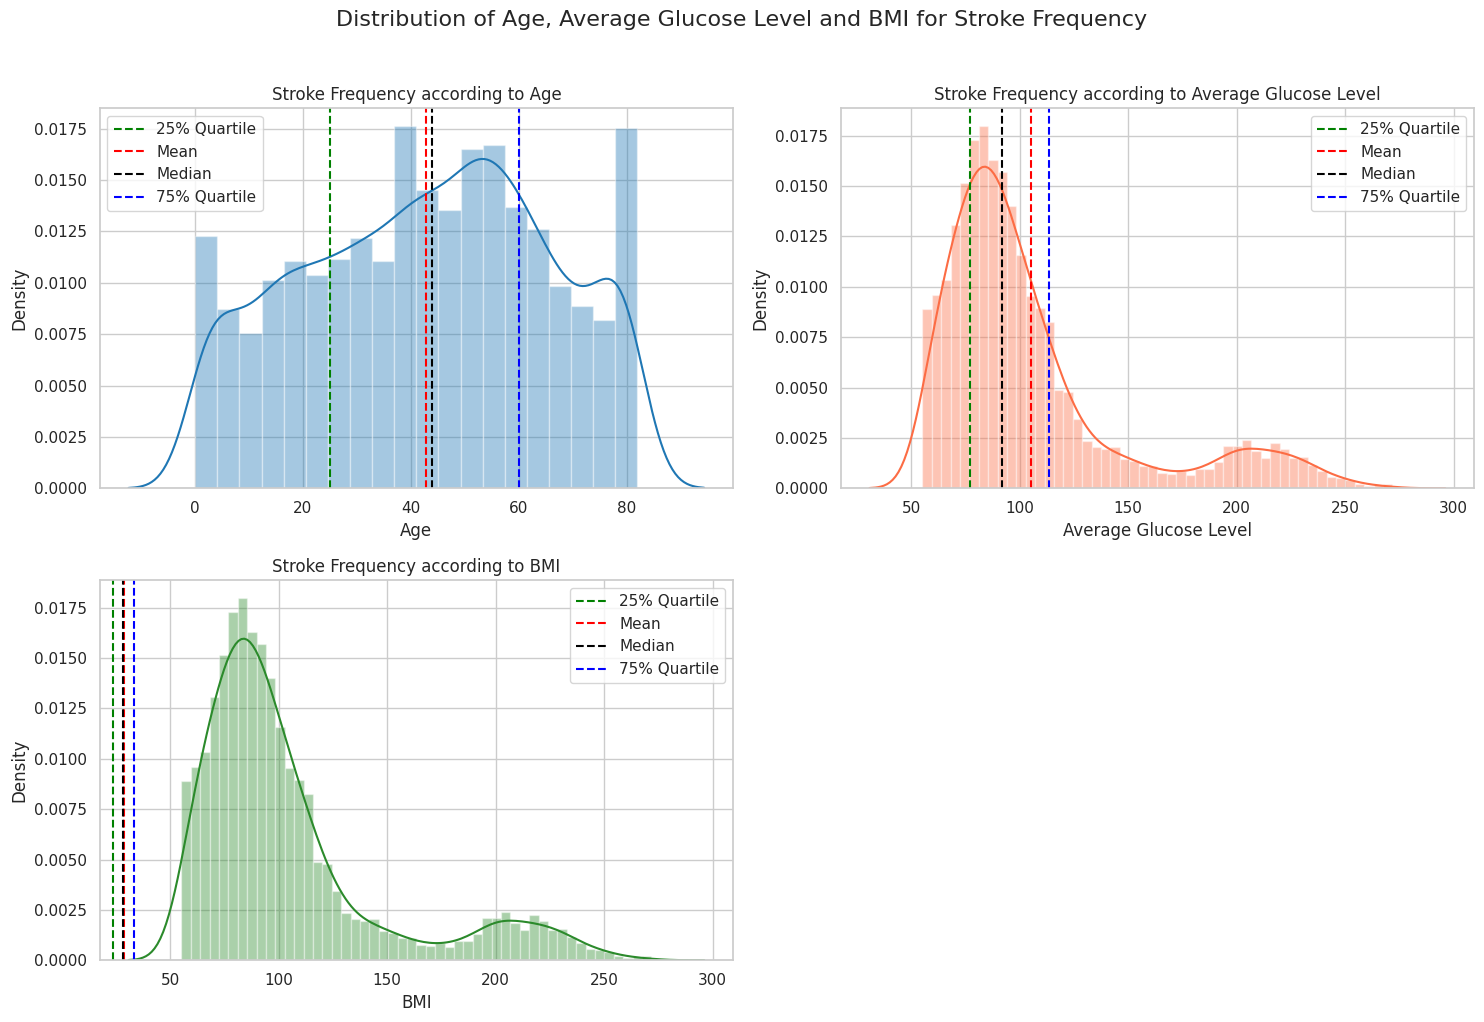

In [ ]:
# Plot histrograms for Age, Average Glucose Level and BMI Distribution

# Making a list with 3 diffrent colors to use for distributions
colours = ['#1f77b4', '#fc6c44', '#2b8a2b']

# Setting the background color of axes
plt.rcParams['axes.facecolor'] = 'white'

# Making a list with column that should be plot
column_to_plot = ['age','avg_glucose_level', 'bmi']

# Making the subplots
fig, axs = plt.subplots(2, 2,figsize=(15, 10))

# Giving a common title for the all plots
fig.suptitle('Distribution of Age, Average Glucose Level and BMI for Stroke Frequency', fontsize=16, y=1.02)

# Plot the histogram(special type - displot)
sns.distplot(df[column_to_plot[0]],ax=axs[0,0], color=colours[0])
# Drawing the 1st quartile
axs[0,0].axvline(df[column_to_plot[0]].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
# Drawing the 2nd quartile(mean)
axs[0,0].axvline(df[column_to_plot[0]].mean(), color='red', linestyle='--', label='Mean')
# Drawing the median line
axs[0,0].axvline(df[column_to_plot[0]].median(), color='black', linestyle='--', label='Median')
# Drawing 75% quartile
axs[0,0].axvline(df[column_to_plot[0]].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
# Setting x label
axs[0,0].set_xlabel('Age')
# Setting the title
axs[0,0].set_title('Stroke Frequency according to Age')
# Setting the legend
axs[0,0].legend()

# Plot the histogram(special type - displot)
sns.distplot(df[column_to_plot[1]], color=colours[1], ax=axs[0,1])
# Drawing the 1st quartile
axs[0,1].axvline(df[column_to_plot[1]].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
# Drawing the 2nd quartile(mean)
axs[0,1].axvline(df[column_to_plot[1]].mean(), color='red', linestyle='--', label='Mean')
# Drawing the median line
axs[0,1].axvline(df[column_to_plot[1]].median(), color='black', linestyle='--', label='Median')
# Drawing 75% quartile
axs[0,1].axvline(df[column_to_plot[1]].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
# Setting x label
axs[0,1].set_xlabel('Average Glucose Level')
# Setting the title
axs[0,1].set_title('Stroke Frequency according to Average Glucose Level')
# Setting the legend
axs[0,1].legend()

sns.distplot(df[column_to_plot[1]], color=colours[2], ax=axs[1,0])
# Drawing the 1st quartile
axs[1,0].axvline(df[column_to_plot[2]].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
# Drawing the 2nd quartile(mean)
axs[1,0].axvline(df[column_to_plot[2]].mean(), color='red', linestyle='--', label='Mean')
# Drawing the median line
axs[1,0].axvline(df[column_to_plot[2]].median(), color='black', linestyle='--', label='Median')
# Drawing 75% quartile
axs[1,0].axvline(df[column_to_plot[2]].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
# Drawing the median line
axs[1,0].set_xlabel('BMI')
# Setting the title
axs[1,0].set_title('Stroke Frequency according to BMI')
# Setting the legend
axs[1,0].legend()

# Remove the last subplot
fig.delaxes(axs[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Showing the plot
plt.show();

#### 5.3.6 Heart Disease Frequency per Work Type, Residence Type and Smoking Status

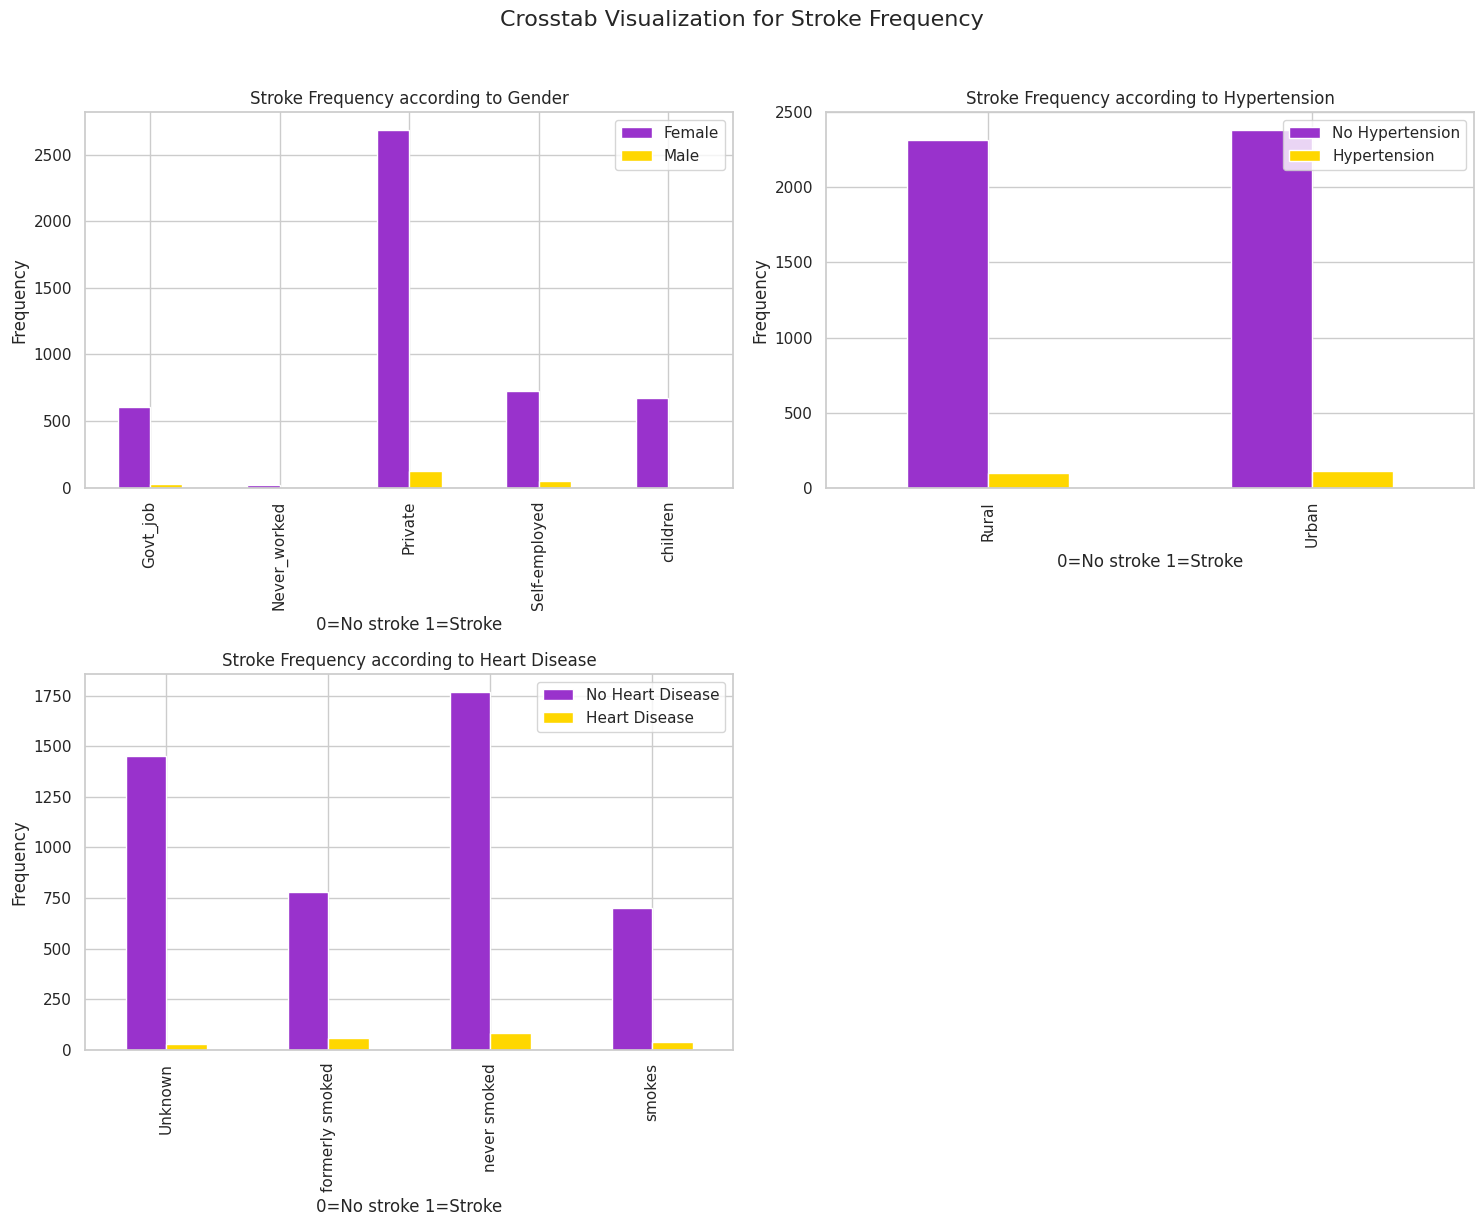

In [ ]:
# Plotting Heart Disease Frequency per Work Type, Residence Type and Smoking Status

# Making a list of columns that should be displayed
crosstabs = ['work_type','Residence_type', 'smoking_status']

# Making crosstabs for each of the above columns
cross1 = pd.crosstab(df[crosstabs[0]], df.stroke)
cross2 = pd.crosstab(df[crosstabs[1]], df.stroke)
cross3 = pd.crosstab(df[crosstabs[2]], df.stroke)

# Making subplots
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# Plotting each of the above crosstabs in bar chart
cross1.plot(kind='bar', ax=axs[0,0], color=["darkorchid","gold"])
cross2.plot(kind='bar', ax=axs[0,1], color=["darkorchid","gold"])
cross3.plot(kind='bar', ax=axs[1,0], color=["darkorchid","gold"])

# Making a common title for all plots
fig.suptitle('Crosstab Visualization for Stroke Frequency', fontsize=16, y=1.02)

# Making title, y label , x label and legend for each subplots
# Here axs[x, x] indicate the position of the subplot
axs[0, 0].set_title('Stroke Frequency according to Gender')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel("0=No stroke 1=Stroke")
axs[0, 0].legend(["Female", "Male"])
axs[0, 1].set_title('Stroke Frequency according to Hypertension')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend(["No Hypertension", "Hypertension"])
axs[0, 1].set_xlabel("0=No stroke 1=Stroke")
axs[1, 0].set_title('Stroke Frequency according to Heart Disease')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend(["No Heart Disease", "Heart Disease"])
axs[1, 0].set_xlabel("0=No stroke 1=Stroke")

# Remove the last subplot
fig.delaxes(axs[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()


### 5.4 Converting Categorical Values into Numerical Values

In [ ]:
# Recalling the information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


As in above thare are some featues having the data type as object. They are;
1. gender
2. ever_married
3. work_type
4. residence_type
5. smoking_status

We have to convert them in to string type first.

In [ ]:
# Creating new dataframe for the features includes the data type 'object'

# Creating a list which have the data type 'object'
cat_columns= df.select_dtypes(include=['object'] )
# Creating a dataframe using it
new_categories = pd.DataFrame(cat_columns)
# Displaying first few rows in dataframe
new_categories.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked


In [ ]:
# Creating a dataframe for the above using One hot encoding for categories. Here result had been converted into integer as if we give float
# model has to compute by thinking more.
dummy_category = dummy_df = pd.get_dummies(new_categories).apply(lambda x: x.astype(bool).astype(int))
# # Displaying first few rows in dataframe
dummy_category.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
# Information of the created all categories
dummy_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Female                   4908 non-null   int64
 1   gender_Male                     4908 non-null   int64
 2   ever_married_No                 4908 non-null   int64
 3   ever_married_Yes                4908 non-null   int64
 4   work_type_Govt_job              4908 non-null   int64
 5   work_type_Never_worked          4908 non-null   int64
 6   work_type_Private               4908 non-null   int64
 7   work_type_Self-employed         4908 non-null   int64
 8   work_type_children              4908 non-null   int64
 9   Residence_type_Rural            4908 non-null   int64
 10  Residence_type_Urban            4908 non-null   int64
 11  smoking_status_Unknown          4908 non-null   int64
 12  smoking_status_formerly smoked  4908 non-null   int64
 13  smo

Now all the features are numerical.

In [ ]:
# There are some features when considering together repeats the same idea. Ex: gender_Male, gender_Female
#  Here they are removed so that the repeating the same data is avoided and reducing the number of cateogories make it easy for the models.

# Creating the list of repeating same idea
categories_to_be_removed = ['gender_Female','ever_married_No','work_type_Govt_job','Residence_type_Rural','smoking_status_Unknown']

# Removing data
dummy_category_formatted = dummy_category.drop(categories_to_be_removed, axis=1)

# First few information of them
dummy_category_formatted.head()

,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,0,1,0,0,1,1,0,0
2,1,1,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0
5,1,1,0,1,0,0,1,1,0,0


In [ ]:
# It is easy to work with features if they are named properly. In below the list contains the collection of featues which are going to be reanamed with
# new names
renamed_categories = {
    'gender_Male':'is_gender_male',
    'ever_married_Yes':'is_ever_married_yes',
    'work_type_Never_worked':'is_work_type_never_worked',
    'work_type_Private':'is_work_type_private',
    'work_type_Self-employed':'is_work_type_self-employed',
    'work_type_children':'is_work_type_children',
    'Residence_type_Urban':'is_residence_type_urban',
    'smoking_status_formerly smoked':'is_smoking_status_formerly smoked',
    'smoking_status_never smoked':'is_smoking_status_never smoked',
    'smoking_status_smokes':'is_smoking_status_smokes'
}

# Giving rename operation using the above list
dummy_category_formatted_renamed=dummy_category_formatted.rename(columns=renamed_categories)

# First few information of the dataframe with rename columns
dummy_category_formatted_renamed.head()

,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
0,1,1,0,1,0,0,1,1,0,0
2,1,1,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0
5,1,1,0,1,0,0,1,1,0,0


In [ ]:
# Now we have to combine the above dataframe to the dataframe that we are using. Following code shows how to do it.
df_final_before= pd.concat([df,dummy_category_formatted_renamed],axis=1)

# The dataframe after combining the columns
df_final_before.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,1,1,0,1,0,0,1,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,1,1,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,1,0,1,0,0,1,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,1,0,0,1,0,0,0,1,0
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,1,1,0,1,0,0,1,1,0,0


In [ ]:
# Now we have to removed the columns with previous categorical data as now we have encoded collection of features for them.

# Creating a list containing the categories to be removed
categories_to_be_dropped = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Removing them from the dataframe
df_final = df_final_before.drop(categories_to_be_dropped, axis=1)
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


It is good to identify the relationships between each of the two features in the dataframe before modeling.

In [ ]:
# Finding the correlation between features
df_final.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313,-0.030280,0.680742,-0.079399,0.120169,0.327306,-0.635044,0.010795,0.242874,0.124273,0.076743
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503,0.021811,0.162350,-0.021345,-0.004581,0.111770,-0.126590,-0.001140,0.062252,0.066671,0.028188
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929,0.082950,0.111203,-0.015315,-0.000239,0.081466,-0.088092,-0.002409,0.071477,-0.020722,0.048667
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984,0.053161,0.151657,-0.013980,0.009124,0.069133,-0.101122,-0.007441,0.073907,0.032225,0.011055
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341,-0.026164,0.341553,-0.028615,0.208205,0.072634,-0.448779,-0.000293,0.107463,0.107847,0.088261
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000,0.006904,0.105051,-0.014152,0.014972,0.055338,-0.080990,0.005988,0.057443,0.010690,0.021513
is_gender_male,-0.030280,0.021811,0.082950,0.053161,-0.026164,0.006904,1.000000,-0.036380,0.012316,-0.038831,-0.022210,0.091732,-0.004351,0.039078,-0.093881,0.011623
is_ever_married_yes,0.680742,0.162350,0.111203,0.151657,0.341553,0.105051,-0.036380,1.000000,-0.092012,0.157102,0.191389,-0.545687,0.004707,0.176745,0.105062,0.106479
is_work_type_never_worked,-0.079399,-0.021345,-0.015315,-0.013980,-0.028615,-0.014152,0.012316,-0.092012,1.000000,-0.077658,-0.029057,-0.026703,0.023419,-0.030404,0.035857,-0.028206
is_work_type_private,0.120169,-0.004581,-0.000239,0.009124,0.208205,0.014972,-0.038831,0.157102,-0.077658,1.000000,-0.501151,-0.460556,-0.016980,0.024498,0.111023,0.099199


Instead of having the values in a table it is pleasant to observe and visualize the above data in a matrix.

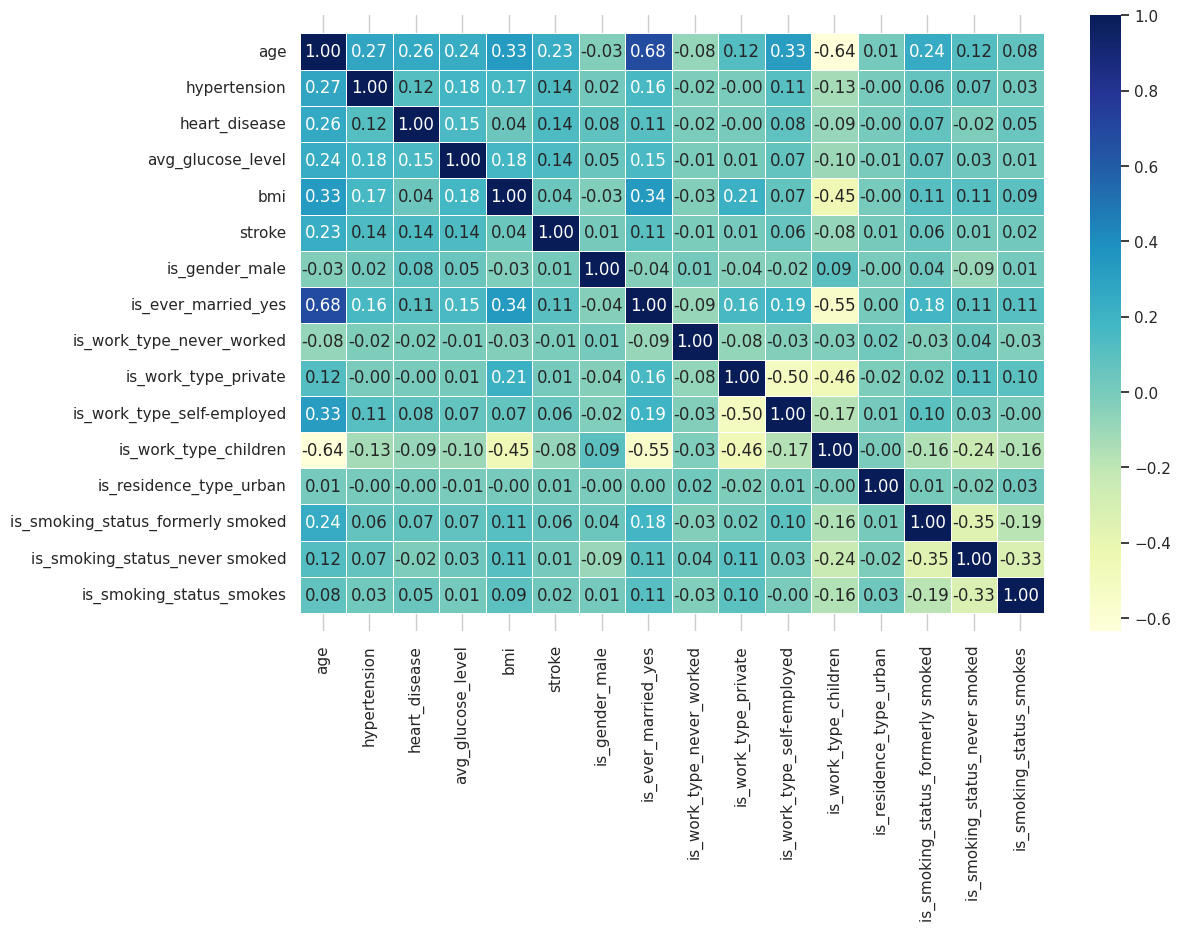

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix=df_final.corr()
fig, ax =plt.subplots(figsize=(12,8))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

bottom ,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

## 6. Modelling

Now we have to use the algorithms for our data set. Before that we should seperate the dataframe into features and target values.

In our data set 'stroke' column is as the target value and other columns are features.

In [ ]:
# Split dat into X and y

# X is created by removing the 'stroke' feature from the dataframe
X=df_final.drop("stroke", axis=1)

# y is created by taking the 'stroke' feature from the dataframe
y=df_final["stroke"]

In [ ]:
# Recalling the number of stroke positive and negative data
df_final['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

As we can see in above the data is unbalanced. In such a case when modelling a model, it can be biased and so that it will be create a less accurate model. So we have to model the data. Here we use RandomUnderSampler which is one of the method to under sampling.

In [ ]:
# Setting the RandomUnderSampler with random state
rus = RandomUnderSampler(random_state=42)

# Sampling the data and saving into new variable
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
# Revisiting the number of stroke positive and negative data
y_resampled.value_counts()

0    209
1    209
Name: stroke, dtype: int64

Now this model is balanced as observed in here. So that now we are able to implement a good model.

In [ ]:
# First few rows of the target value
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

Now we have to divide the data set into train and test data set.

Here we considered 70% of data as training and other rest of the data as test data set.

In [ ]:
# Split data into train and test set

# The above we saw that our data frame first contain positive stroke data set and the negative stroke data. If we use it directly model is wrongly
# trained as the data set is not randomized.

# Randomize the data set
np.random.seed(42)

#Split the data set into train and test data set considering the test data set size as 30%
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
# Train feature values set
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
336,80.0,0,0,76.57,34.1,0,1,0,0,1,0,1,0,1,0
31,51.0,0,0,111.13,32.7,1,1,0,1,0,0,0,1,0,0
84,6.0,0,0,87.74,17.7,1,0,0,0,0,1,1,0,0,0
287,78.0,0,0,235.63,32.3,0,1,0,1,0,0,0,0,1,0
317,73.0,1,0,190.14,36.5,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,18.0,0,0,98.10,21.8,0,0,0,1,0,0,0,0,1,0
106,60.0,0,0,101.34,32.8,1,1,0,1,0,0,0,0,1,0
270,80.0,0,1,66.72,21.7,0,1,0,0,1,0,0,1,0,0
348,79.0,1,0,98.02,22.3,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Train label value set
y_train

336    1
31     0
84     0
287    1
317    1
      ..
71     0
106    0
270    1
348    1
102    0
Name: stroke, Length: 334, dtype: int64

In [ ]:
# Test feature value set
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
321,71.0,0,0,263.32,38.7,0,1,0,0,0,0,1,0,1,0
324,76.0,1,0,194.37,27.0,1,1,0,0,1,0,0,1,0,0
388,78.0,0,0,116.10,27.1,1,1,0,0,1,0,1,0,1,0
56,5.0,0,0,92.23,16.7,1,0,0,0,0,1,1,0,0,0
153,40.0,0,0,74.65,25.3,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,80.0,1,1,84.31,30.3,1,1,0,0,1,0,1,0,0,1
126,50.0,0,0,120.44,30.3,1,1,0,1,0,0,1,0,1,0
24,0.8,0,0,98.67,17.5,1,0,0,0,0,1,0,0,0,0
17,68.0,0,0,121.66,29.1,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Test label value set
y_test

321    1
324    1
388    1
56     0
153    0
      ..
57     0
126    0
24     0
17     0
66     0
Name: stroke, Length: 84, dtype: int64

In [ ]:
# Information of the data set to be modelled
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                4908 non-null   float64
 1   hypertension                       4908 non-null   int64  
 2   heart_disease                      4908 non-null   int64  
 3   avg_glucose_level                  4908 non-null   float64
 4   bmi                                4908 non-null   float64
 5   stroke                             4908 non-null   int64  
 6   is_gender_male                     4908 non-null   int64  
 7   is_ever_married_yes                4908 non-null   int64  
 8   is_work_type_never_worked          4908 non-null   int64  
 9   is_work_type_private               4908 non-null   int64  
 10  is_work_type_self-employed         4908 non-null   int64  
 11  is_work_type_children              4908 non-null   int64

According to the above data, age, hypertension, avg_glucose_level, bmi data should be standardized before modelling.

In [ ]:
# The categories that should be scaled
cateogires_to_be_scaled = ['age' , 'avg_glucose_level', 'bmi']

# Calling the Standard scalar and saving it in a variable to use
scalar = StandardScaler()

# Scaling the train features and test features
X_train[cateogires_to_be_scaled] = scalar.fit_transform(X_train[cateogires_to_be_scaled])
X_test[cateogires_to_be_scaled] = scalar.transform(X_test[cateogires_to_be_scaled])

In [ ]:
# First few columns in training features set
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
336,1.118655,0,0,-0.737910,0.594901,0,1,0,0,1,0,1,0,1,0
31,-0.144135,0,0,-0.120978,0.410471,1,1,0,1,0,0,0,1,0,0
84,-2.103637,0,0,-0.538514,-1.565565,1,0,0,0,0,1,1,0,0,0
287,1.031566,0,0,2.101477,0.357777,0,1,0,1,0,0,0,0,1,0
317,0.813844,1,0,1.289433,0.911067,0,1,0,1,0,0,0,0,1,0


In [ ]:
# First few columns in training label data
X_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,is_gender_male,is_ever_married_yes,is_work_type_never_worked,is_work_type_private,is_work_type_self-employed,is_work_type_children,is_residence_type_urban,is_smoking_status_formerly smoked,is_smoking_status_never smoked,is_smoking_status_smokes
321,0.726755,0,0,2.595772,1.200886,0,1,0,0,0,0,1,0,1,0
324,0.944477,1,0,1.364943,-0.340422,1,1,0,0,1,0,0,1,0,0
388,1.031566,0,0,-0.032259,-0.327249,1,1,0,0,1,0,1,0,1,0
56,-2.147181,0,0,-0.458363,-1.697301,1,0,0,0,0,1,1,0,0,0
153,-0.623124,0,0,-0.772184,-0.564373,0,1,0,1,0,0,1,1,0,0


Now we have to do try the two different models ofr the data set.

In [ ]:
# Training and fitting the data set with selected models

# Put models in a dictionary
model={"Logistic Regression": LogisticRegression(),
      "Naive Bayes": GaussianNB(),
      }

# Create a function to fit and score models
def fit_and_score (models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning model
    models: a dict of different Scikit Leaarn ML models
    X_train: taining data(not labels)
    X_test: testing data (no labels)
    y_train: taining labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores={}

    #Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        y_pred_without_tuning = model.predict(X_test)
        # Evaluate the model and append its score to model_scores(Accuracy, Precision, Recall, F1, Confusion Matrix and Classification Report)
        print(f'{name} Performance before Tuning\n')
        print(f'Accuracy             : {accuracy_score(y_test, y_pred_without_tuning)}')
        print(f'Precision            : {precision_score(y_test, y_pred_without_tuning)}')
        print(f'Recall               : {recall_score(y_test, y_pred_without_tuning)}')
        print(f'F1 Score             : {f1_score(y_test, y_pred_without_tuning)}')
        print(f'Confusion Matrix     :\n{confusion_matrix(y_test, y_pred_without_tuning)}')
        print(f'Classification Report:\n{classification_report(y_test, y_pred_without_tuning)}\n\n')


In [ ]:
# Calling the function and displaying the results
fit_and_score(models= model,
                          X_train=X_train,
                          y_train=y_train,
                          X_test=X_test,
                          y_test=y_test)


Logistic Regression Performance before Tuning

Accuracy             : 0.8095238095238095
Precision            : 0.782608695652174
Recall               : 0.8571428571428571
F1 Score             : 0.8181818181818182
Confusion Matrix     :
[[32 10]
 [ 6 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.78      0.86      0.82        42

    accuracy                           0.81        84
   macro avg       0.81      0.81      0.81        84
weighted avg       0.81      0.81      0.81        84



Naive Bayes Performance before Tuning

Accuracy             : 0.5952380952380952
Precision            : 0.5526315789473685
Recall               : 1.0
F1 Score             : 0.711864406779661
Confusion Matrix     :
[[ 8 34]
 [ 0 42]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        42
           1       0.55    

## 7. Hyperparameter Tuning

Now we have to select the best paramters for the model.

Below shows the hyperparameter tuning for the Logistice Regression.

In [ ]:
# Save the model in a variable
logistic_model = LogisticRegression()
# Give parameter values for grid search cv
logistic_param_grid = {"C": [0.9, 0.8],# np.logspace(-0.01,0.05,30),
               "solver": ["liblinear"]}

# Create GridSearchCV with multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
}

# Using K-flod cross validation
# Number of folds
k_folds = 20
# Creating and saving kfold model
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create GridSearchCV with multiple scoring metrics for Logistic Regression
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, scoring=scoring, cv=kf, refit='f1')
# Fitting to the model
logistic_grid_search.fit(X_train, y_train)

# Finding the best parameter values
logistic_best_parameters = logistic_grid_search.best_params_
# Predicting test data set using the best parameter model
y_pred_after_tuning_logistic = logistic_grid_search.best_estimator_.predict(X_test)

#Evaluate the model and append its score to model_scores(Accuracy, Precision, Recall, F1, Confusion Matrix and Classification Report)
print(f'Logistic Regression Performance after Tuning\n')
print(f'Best Parameters      : {logistic_best_parameters}')
accuracy_score_logistic = accuracy_score(y_test, y_pred_after_tuning_logistic)
print(f'Accuracy             : {(accuracy_score_logistic):.3f}')
precision_score_logistic = precision_score(y_test, y_pred_after_tuning_logistic)
print(f'Precision            : {(precision_score_logistic):.3f}')
recall_score_logistic = recall_score(y_test, y_pred_after_tuning_logistic)
print(f'Recall               : {(recall_score_logistic):.3f}')
f1_score_logistic = f1_score(y_test, y_pred_after_tuning_logistic)
print(f'F1 Score             : {(f1_score_logistic):.3f}')
print(f'Confusion Matrix     :\n{confusion_matrix(y_test, y_pred_after_tuning_logistic)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_after_tuning_logistic)}\n\n')


Logistic Regression Performance after Tuning

Best Parameters      : {'C': 0.9, 'solver': 'liblinear'}
Accuracy             : 0.810
Precision            : 0.783
Recall               : 0.857
F1 Score             : 0.818
Confusion Matrix     :
[[32 10]
 [ 6 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.78      0.86      0.82        42

    accuracy                           0.81        84
   macro avg       0.81      0.81      0.81        84
weighted avg       0.81      0.81      0.81        84





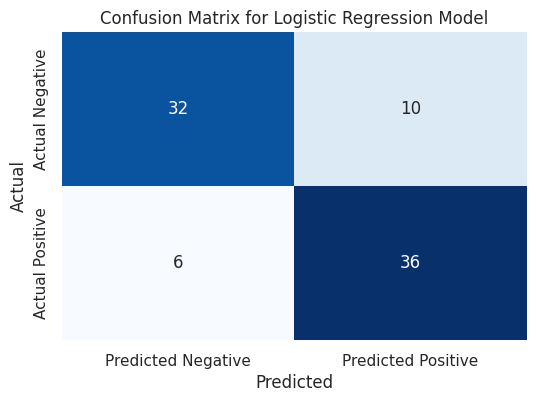

In [ ]:
# Displaying confusion matrix in a pleasent way

# Calculating the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_after_tuning_logistic)

# Plotting the confusion matrix using seaborn and matplotlib
# Setting figure size
plt.figure(figsize=(6, 4))
# Plotting confusion matrix in a heat map
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
# Setting a title
plt.title('Confusion Matrix for Logistic Regression Model')
# Setting the x label
plt.xlabel('Predicted')
# Setting the y label
plt.ylabel('Actual')
# Showing the plot
plt.show()

In [ ]:
# Calculating the prediction value for the data
y_train_pred_logistic = logistic_grid_search.best_estimator_.predict(X_train)

#Claculating the f1 socre of the training results
training_f1score_logistic = f1_score(y_train, y_train_pred_logistic)
# Printing the training accuracy
print(f'Training F1 Score: {(training_f1score_logistic):.3f}')
# Printing the testing accuracy
print(f'Testing F1 Score  : {(f1_score_logistic):.3f}\n')

# Calculating the accuracy of the training results
training_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
# Printing the training accuracy
print(f'Training Accuracy: {training_accuracy_logistic}')
# Printing the testing accuracy
print(f'Testing Accuracy  : {(accuracy_score_logistic)}\n')

# Calculating the accuracy, specificity and sensitivity
confusion_matrix_logistic=confusion_matrix(y_test, y_pred_after_tuning_logistic)
# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion_matrix_logistic[1, 1]  # True Positives
TN = confusion_matrix_logistic[0, 0]  # True Negatives
FP = confusion_matrix_logistic[0, 1]  # False Positives
FN = confusion_matrix_logistic[1, 0]  # False Negatives

# Calculate sensitivity and specificity
sensitivity_logistic = TP / (TP + FN)
specificity_logistic = TN / (TN + FP)
accuracy_logistic = ( TP + TN) / ( TP + TN + FP +FN )

# Displaying the each scores
print(f"Sensitivity (True Positive Rate): {sensitivity_logistic:.3f}")
print(f"Specificity (True Negative Rate): {specificity_logistic:.3f}")
print(f"Accuracy                        : {accuracy_logistic:.3f}")


Training F1 Score: 0.770
Testing F1 Score  : 0.818

Training Accuracy: 0.7634730538922155
Testing Accuracy  : 0.8095238095238095

Sensitivity (True Positive Rate): 0.857
Specificity (True Negative Rate): 0.762
Accuracy                        : 0.810


When we comparing the accuracy of the both the values are nearly same. So that we can conclude that the model is fitted properly.

In [ ]:
# Save the model in a variable
naive_bayes_model = GaussianNB()
# Give parameter values for grid search cv
naive_bayes_param_grid = {'priors': [None, [1,1], [0.5, 0.5], [0.25,0.25,0.25, 0.25]],  # Trying with no priors and equal priors
    'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10] } # Varying values for var_smoothing

# Create GridSearchCV with multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Using K-flod cross validation
# Number of folds
k_folds = 20
# Creating and saving kfold model
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create GridSearchCV with multiple scoring metrics for Naive Bayes
naive_bayes_grid_search = GridSearchCV(naive_bayes_model, naive_bayes_param_grid, scoring=scoring, cv=5, refit='accuracy')
# Fitting to the model
naive_bayes_grid_search.fit(X_train, y_train)

# Finding the best parameter values
naivebayes_best_parameters = naive_bayes_grid_search.best_params_
# Predicting test data set using the best parameter model
y_pred_after_tuning_naivebayes = naive_bayes_grid_search.best_estimator_.predict(X_test)

#Evaluate the model and append its score to model_scores(Accuracy, Precision, Recall, F1, Confusion Matrix and Classification Report)
print('Naive Bayes Performance after Tuning\n')
print(f'Best Parameters      : {naivebayes_best_parameters}')
accuracy_score_naive_bayes = accuracy_score(y_test, y_pred_after_tuning_naivebayes)
print(f'Accuracy             : {(accuracy_score_naive_bayes):.3f}')
precision_score_naive_bayes = precision_score(y_test, y_pred_after_tuning_naivebayes)
print(f'Precision            : {(precision_score_naive_bayes):.3f}')
recall_score_naive_bayes = recall_score(y_test, y_pred_after_tuning_naivebayes)
print(f'Recall               : {(recall_score_naive_bayes):.3f}')
f1_score_naive_bayes =f1_score(y_test, y_pred_after_tuning_naivebayes)
print(f'F1 Score             : {(f1_score_naive_bayes):.3f}')
print(f'Confusion Matrix     :\n{confusion_matrix(y_test, y_pred_after_tuning_naivebayes)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_after_tuning_naivebayes)}\n\n')

Naive Bayes Performance after Tuning

Best Parameters      : {'priors': None, 'var_smoothing': 1}
Accuracy             : 0.774
Precision            : 0.689
Recall               : 1.000
F1 Score             : 0.816
Confusion Matrix     :
[[23 19]
 [ 0 42]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        42
           1       0.69      1.00      0.82        42

    accuracy                           0.77        84
   macro avg       0.84      0.77      0.76        84
weighted avg       0.84      0.77      0.76        84





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 457, in _partial_fit
    raise ValueError("The sum of the priors should be 1.")
ValueError: The sum of the priors sho

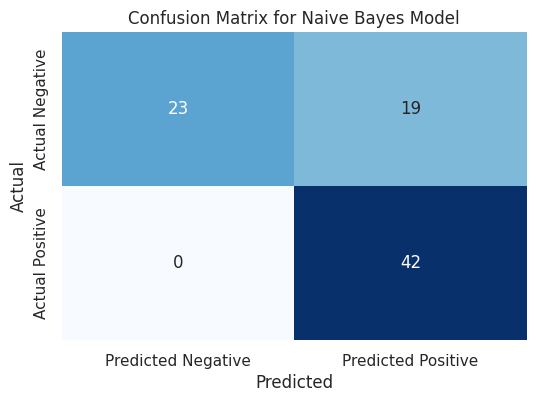

In [ ]:
# Displaying confusion matrix in a pleasent way

# Calculating the confusion matrix
cm_naivebayes = confusion_matrix(y_test, y_pred_after_tuning_naivebayes)

# Plotting the confusion matrix using seaborn and matplotlib
# Setting figure size
plt.figure(figsize=(6, 4))
# Plotting confusion matrix in a heat map
sns.heatmap(cm_naivebayes, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
# Setting a title
plt.title('Confusion Matrix for Naive Bayes Model')
# Setting xlabel
plt.xlabel('Predicted')
# Setting ylable
plt.ylabel('Actual')
# Showing the plot
plt.show()

In [ ]:
# Checking for the fitting condition of the data

# Calculating the prediction value for the data
y_train_pred_naivebayes = naive_bayes_grid_search.best_estimator_.predict(X_train)

#Calculating the f1 socre of the training results
training_f1score_naivebayes = f1_score(y_train, y_train_pred_naivebayes)
# Printing the training accuracy
print(f'Training F1 Score: {(training_f1score_naivebayes):.3f}')
# Printing the testing accuracy
print(f'Testing F1 Score  : {(f1_score_naive_bayes):.3f}\n')

# Calculating the accuracy of the training results
training_accuracy_naivebayes = accuracy_score(y_train, y_train_pred_naivebayes)
# Printing the training accuracy
print(f'Training Accuracy: {(training_accuracy_naivebayes):.3f}')
# Printing the testing accuracy
print(f'Testing Accuracy  : {(accuracy_score_naive_bayes):.3f}\n')

# Calculating the accuracy, specificity and sensitivity
confusion_matrix_naive_bayes=confusion_matrix(y_test, y_pred_after_tuning_naivebayes)
# Extract TP, TN, FP, FN from the confusion matrix
TP = confusion_matrix_naive_bayes[1, 1]  # True Positives
TN = confusion_matrix_naive_bayes[0, 0]  # True Negatives
FP = confusion_matrix_naive_bayes[0, 1]  # False Positives
FN = confusion_matrix_naive_bayes[1, 0]  # False Negatives

# Calculate sensitivity and specificity
sensitivity_naive_bayes = TP / (TP + FN)
specificity_naive_bayes = TN / (TN + FP)
accuracy_naive_bayes = ( TP + TN) / ( TP + TN + FP +FN )

print(f"Sensitivity (True Positive Rate): {sensitivity_naive_bayes:.3f}")
print(f"Specificity (True Negative Rate): {specificity_naive_bayes:.3f}")
print(f"Accuracy                        : {accuracy_naive_bayes:.3f}")

Training F1 Score: 0.772
Testing F1 Score  : 0.816

Training Accuracy: 0.740
Testing Accuracy  : 0.774

Sensitivity (True Positive Rate): 1.000
Specificity (True Negative Rate): 0.548
Accuracy                        : 0.774


## 7. Comparing the two models

Now we have tuned the model upto the best model we can obtained.

Now we have to compare both the models and select the best one.

Here we have to plot the scores in same plots and compare.

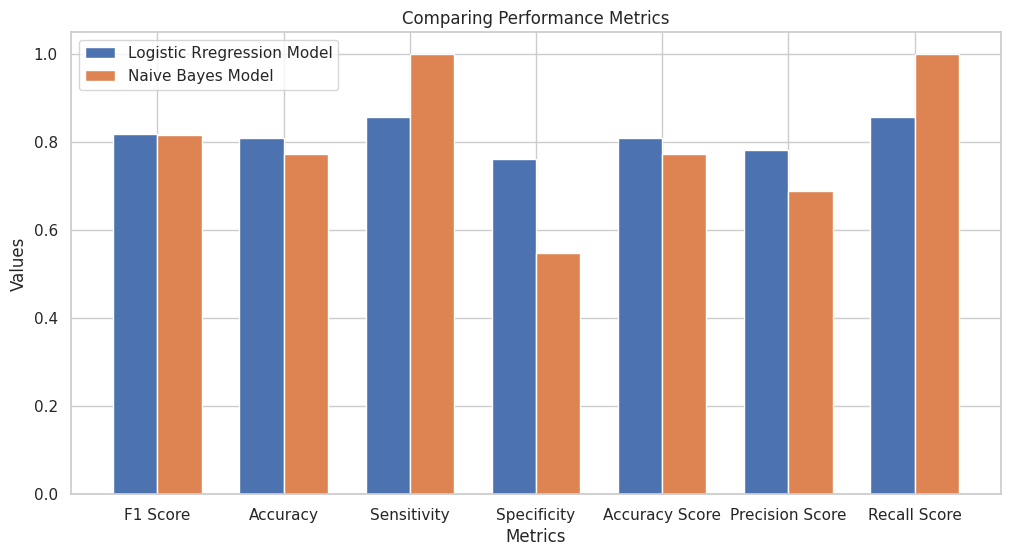

In [ ]:


metrics = ["F1 Score", "Accuracy", "Sensitivity", "Specificity", "Accuracy Score", "Precision Score", "Recall Score", ]
logistic_values = [f1_score_logistic, accuracy_logistic, sensitivity_logistic, specificity_logistic, accuracy_score_logistic, precision_score_logistic, recall_score_logistic]
naive_bayes_values = [f1_score_naive_bayes, accuracy_score_naive_bayes, sensitivity_naive_bayes, specificity_naive_bayes, accuracy_score_naive_bayes, precision_score_naive_bayes, recall_score_naive_bayes]

plt.figure(figsize=(12, 6))
# Plotting
bar_width = 0.35
index = range(len(metrics))
plt.bar(index, logistic_values, width=bar_width, label='Logistic Rregression Model')
plt.bar([i + bar_width for i in index], naive_bayes_values, width=bar_width, label='Naive Bayes Model')

# Adding labels
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparing Performance Metrics')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()

# Display the plot
plt.show()

Here also when we comparing the both values, they are almost same. So that we can conclude the model has been properly fitted.

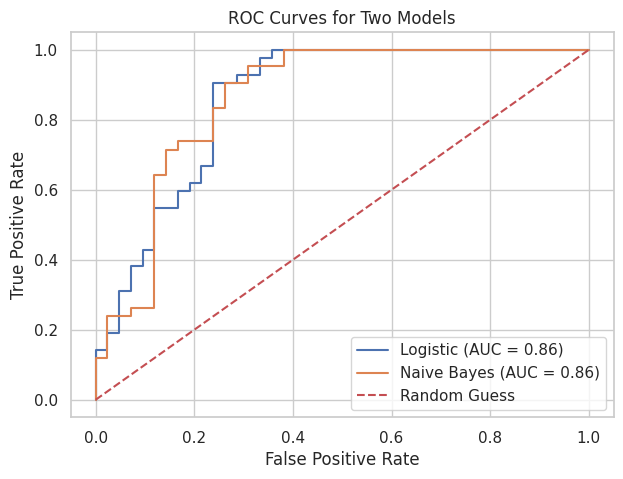

In [ ]:
y_probs_logistic = logistic_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_probs_naive_bayes = naive_bayes_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_probs_logistic, 'Naive Bayes': y_probs_naive_bayes})

# Plot ROC curve for each model
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'Naive Bayes']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

The both are having nearly same behavior.

##### Best Selected Model :

Our prior concern was to F1 Score and Accuracy as discussed in Part 3.
When considering it Logistic Regression model has a good performance.

Further specificity and sensitivity is also important for a health related model. Although sensitivity performance is high in Naive Bayes model, specificity and the earlier mentioned parameters are good in Logistic Regression model.

By concidering them in the plot drawn in above the best model is the model implemented using the Logistic Regreesion.

When considering the othe parameters as well, Logistic Regression Model is good than Naive Bayes model in this case.

####                Best Model : Logistic Regression Model with Parameters : {'C': 0.9, 'solver': 'liblinear'}